
Projeto - Classificação

1. Considerações iniciais

Neste notebook vamos praticar a construção de um modelo de Machine Learning. Mais especificamente, iremos utilizar um algoritmo para realizar um processo de classificação. Propositalmente, evitaremos adentrar em algoritmos e explicações mais complexas, pois o foco é percorrer o fluxo do Aprendizado de Máquina por inteiro, ou o máximo dele.

1.1. O Problema de Negócio

A churn rate (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes de um serviço que interrompe suas assinaturas dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (churn rate).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua churn rate.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

1.2. Descrição do dados

No arquivo Churn_Modelling.csv você encontrará:

RowNumber: id do registro/linha.

CustomerId: identificador único do cliente.

Surname: sobrenome do cliente.

CreditScore: pontuação de crédito do cliente.

Geography: país de origem do cliente.

Gender: sexo do cliente.

Age: idade do cliente.

Tenure: número de anos em que o cliente está com o banco.

Balance: saldo bancário.

NumOfProducts: número de produtos que o cliente utiliza.

HasCrCard: indica se o cliente tem (1) ou não tem (0) cartão de crédito.

IsActiveMember: indica se o cliente é (1) ou não é (0) ativo no banco.

EstimatedSalary: salário estimado em dólares.

Exited: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi 
retido (0).

1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

**Trabalhe até conseguir uma acurácia acima e 85%.**

2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:

Análise exploratória

Preparação e limpeza dos dados

Seleção de atributos

Construção do modelo

Avaliação do modelo

Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se 
obter um resultado satisfatório.

Sugestões de modelos:

Logistic Regression Classification

K-Nearest Neighbour (KNN) Classification

Support Vector Machine (SVM) Classification

Naive Bayes Classification

Decision Tree Classification

Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
url = "https://raw.githubusercontent.com/awarischool/br-classification-project/master/Churn_Modelling.csv"
data = pd.read_csv(url)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
del data['RowNumber']
del data['CustomerId']
del data['Surname']
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
data = pd.get_dummies(data)
data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_Abazu,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,Surname_Abel,Surname_Abernathy,Surname_Abramov,Surname_Abramova,Surname_Abramovich,Surname_Abramowitz,Surname_Abrego,Surname_Abron,Surname_Achebe,Surname_Adams,Surname_Adamson,Surname_Afamefula,Surname_Afamefuna,Surname_Afanasyev,Surname_Afanasyeva,Surname_Agafonova,Surname_Aguirre,Surname_Ah Mouy,Surname_Ahern,Surname_Ahmed,Surname_Aiken,Surname_Aikenhead,Surname_Ainsworth,Surname_Aitken,...,Surname_Young,Surname_Younger,Surname_Yu,Surname_Yuan,Surname_Yudin,Surname_Yudina,Surname_Yuille,Surname_Yuriev,Surname_Yuryeva,Surname_Yusupov,Surname_Yusupova,Surname_Zack,Surname_Zaitsev,Surname_Zakharov,Surname_Zarate,Surname_Zaytseva,Surname_Zetticci,Surname_Zhdanov,Surname_Zhdanova,Surname_Zhirov,Surname_Zhou,Surname_Zikoranachidimma,Surname_Zikoranachukwudimma,Surname_Zikoranaudodimma,Surname_Zimmer,Surname_Zinachukwudi,Surname_Zito,Surname_Zotov,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
Geography_France,10000.0,0.501400,0.500023,0.00,0.00,1.000,1.0000,1.00


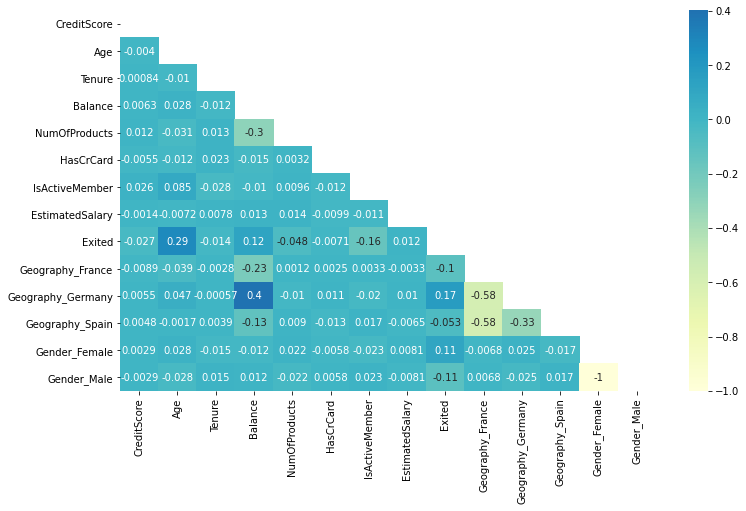

In [ ]:
corr=data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), mask = mask, annot=True, center=0, cmap="YlGnBu")

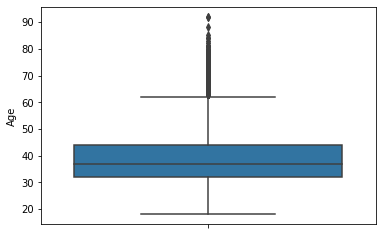

In [ ]:
sns.boxplot(data=data,y='Age')

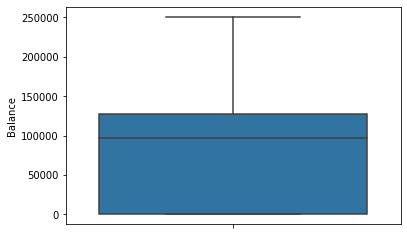

In [ ]:
sns.boxplot(data=data,y='Balance')

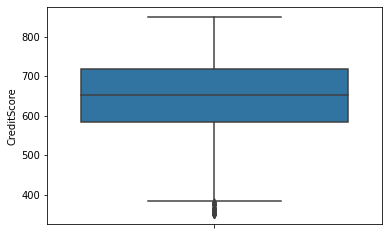

In [ ]:
sns.boxplot(data=data,y='CreditScore')

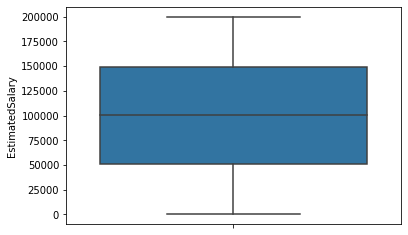

In [ ]:
sns.boxplot(data=data,y='EstimatedSalary')

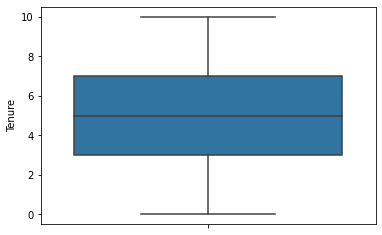

In [ ]:
sns.boxplot(data=data,y='Tenure')

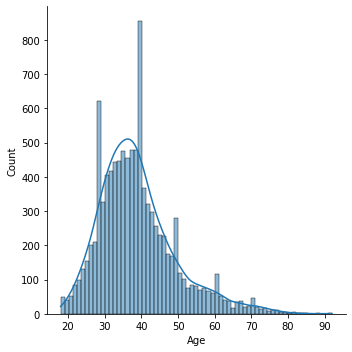

In [ ]:
sns.displot(data=data, x="Age",kde=True)

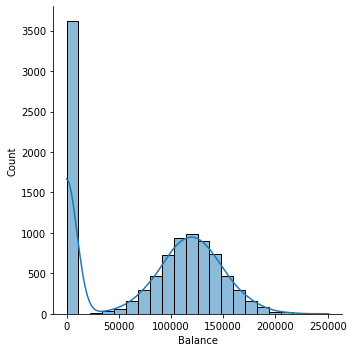

In [ ]:
sns.displot(data=data, x="Balance",kde=True)

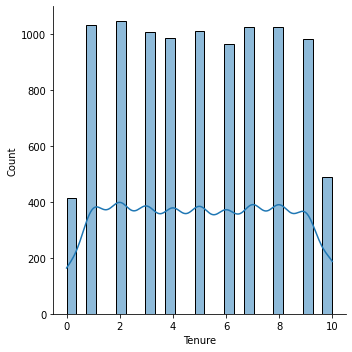

In [ ]:
sns.displot(data=data, x="Tenure",kde=True)

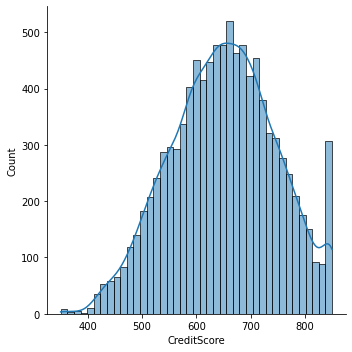

In [ ]:
sns.displot(data=data, x="CreditScore",kde=True)

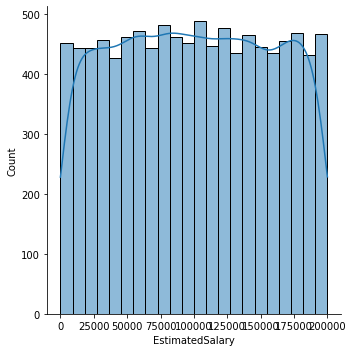

In [ ]:
sns.displot(data=data, x="EstimatedSalary",kde=True)

In [ ]:
data[data.columns.difference(['Exited'])].columns

Index(['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'HasCrCard', 'IsActiveMember', 'NumOfProducts',
       'Tenure'],
      dtype='object')

In [ ]:
#fazer isso antes
train,test = train_test_split(data, test_size=0.2, random_state=100,stratify = data['Exited'])
X_cols = ['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Gender_Female', 'Geography_France', 'Geography_Germany', 'HasCrCard', 'IsActiveMember', 'NumOfProducts','Tenure']
X_train, X_test = train[X_cols], test[X_cols]
y_train, y_test = train['Exited'], test['Exited']
reg = RandomForestClassifier()
reg.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
data_lg = X_train.copy()
data_lg['EstimatedSalary'] = X_train['EstimatedSalary'].apply(np.log1p)
data_lg['Balance'] = X_train['Balance'].apply(np.log1p)

In [ ]:
data_filtrado = data_lg[(data_lg['CreditScore']<800) & (data_lg['Age']<60)]
data_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7085 entries, 1814 to 5518
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                7085 non-null   int64  
 1   Balance            7085 non-null   float64
 2   CreditScore        7085 non-null   int64  
 3   EstimatedSalary    7085 non-null   float64
 4   Gender_Female      7085 non-null   uint8  
 5   Geography_France   7085 non-null   uint8  
 6   Geography_Germany  7085 non-null   uint8  
 7   HasCrCard          7085 non-null   int64  
 8   IsActiveMember     7085 non-null   int64  
 9   NumOfProducts      7085 non-null   int64  
 10  Tenure             7085 non-null   int64  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 518.9 KB


In [ ]:
print(f'teste: {reg.score(X_test, y_test)}')
if reg.score(X_test, y_test)>0.85:
  print('SHOW!!!!!!')
else:
  print('Melhora isso aí')  

teste: 0.859
SHOW!!!!!!
